# Loan features and their relationships
## by Chloe Ng

## Investigation Overview

> The overall goal of this investigation is to show how the loan data variables can be related or unrelated to each other through visualisation. It starts with some univariate plots showing basic information of the dataset. Then, it ends with visualising relationships and correlation. 


## Dataset Overview

> This is a dataset of loan data from Prosper til 2014. There are 113,937 rows in the dataset with 81 features. Most variables are numeric in nature, other common features include loan and borrower ratings, and percentage of interests and yield. There are no data cleaning performed even though there exists a large number of null values because of nature of the features. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
url = 'prosperLoanData.csv'
df = pd.read_csv(url)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Credit Grades and Prosper Ratings

> For Prosper Rating, most of the borrowers' rating are around grade B, C, and D, with grade C consisting the most of the loans. The situation is similar for Credit Grading, with the most common grade as C, D and B. The borrowers with the best rating AA are very little. We can also see more borrowers have Prosper Rating than those who have Credit Grade.

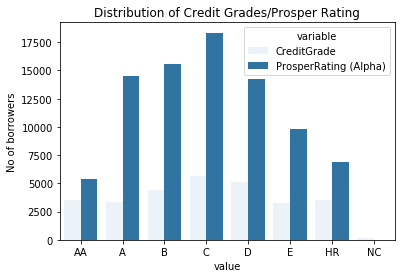

In [30]:
base_color = sb.color_palette()[0]
melt = pd.melt(df, id_vars=['ListingKey'], value_vars=['CreditGrade','ProsperRating (Alpha)'])
level_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
sb.countplot(melt.value, hue= melt.variable, color = base_color, order=level_order)
plt.title('Distribution of Credit Grades/Prosper Rating')
plt.ylabel('No of borrowers');


## Loan period distribution

> The majority of loans are of 3 years loan period. Some are with 60 months and the least common ones are one-year loa

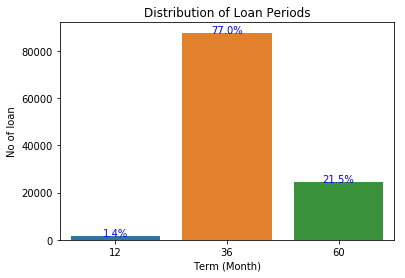

In [23]:
ax = sb.countplot(df.Term)
# plt.figure(figsize=(15,5))
plt.title('Distribution of Loan Periods')
plt.ylabel('No of loan')
plt.xlabel('Term (Month)')

# get total no of observation
n_points = df.shape[0] 
# calculate count by terms
term_count = df.Term.value_counts()
# get the current tick locations and labels
locs, labels = plt.xticks()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    # turn it to integer
    count = term_count[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count, pct_string, ha = 'center', color = 'b')


## How do score change, loan payment and loan status are associated?

From this chart, we can confirm that most of the borrowers' score remains more or less the same in this investigation. For those with no or positive score change, the loans are mostly current, completed. It is difficult to identify the loan status in this graph. So color scheme for categorical variables will work better here, instead of viridis. But still, we can see that for borrowers with negative score, they have more of the cancelled, past due loan status.

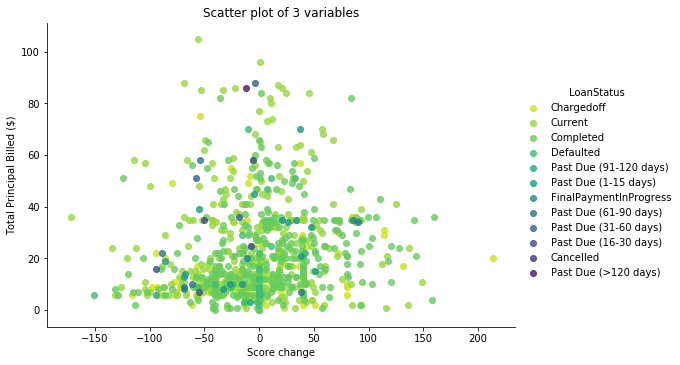

In [28]:
# take random sample to avoid over plotting
np.random.seed(20)
sample = np.random.choice(df.shape[0], 5000, replace=False)

df_subset = df.loc[sample]

g = sb.FacetGrid(data = df_subset, hue='LoanStatus',
                size = 5, aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'ScorexChangeAtTimeOfListing', 'TotalProsperPaymentsBilled',
         x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.title('Scatter plot of 3 variables')
plt.xlabel('Score change')
plt.ylabel('Total Principal Billed ($)');

## Correlation between numeric variables

Disappointingly, there doesn't seem to be much correlation between numeric and categorical variables investigated. It appears that there are no strong relationship between the numeric variables explored. The strongly correlated ones are total payment billed and total loans - they have a positive relationship. Next we will look more into categorical variables.

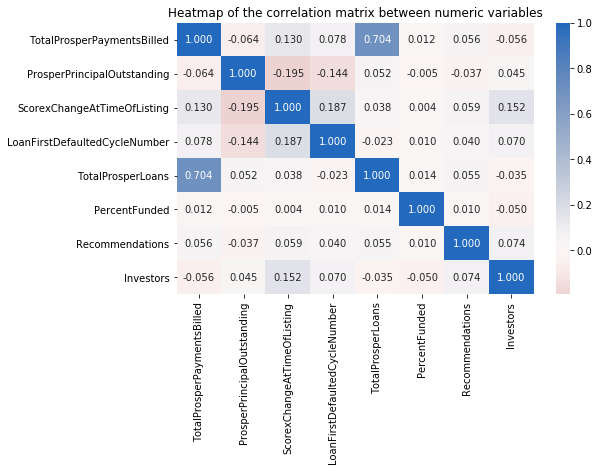

In [29]:
numeric_vars = [
    'TotalProsperPaymentsBilled',
    'ProsperPrincipalOutstanding',
    'ScorexChangeAtTimeOfListing',
    'LoanFirstDefaultedCycleNumber',
    'TotalProsperLoans',
    'PercentFunded',
    'Recommendations',
    'Investors'
]

# correlation coefficient heatmap
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Heatmap of the correlation matrix between numeric variables')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!